**Set environment**

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

## Preview

In [2]:
FD_RES = "/mount/repo/Proj_ENCODE_FCC/results"
txt_fdiry = os.path.join(
    FD_RES,
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
np.sort(os.listdir(txt_fdiry))

array(['.ipynb_checkpoints',
       'hclust.col.annotation.prepare.chipseq_full.fcc.tss.rds',
       'hclust.col.annotation.prepare.chipseq_full.only.rds',
       'hclust.col.annotation.test_chrX.chipseq_full.only.rds',
       'hclust.row.annotation.prepare.chipseq_full.fcc.tss.rds',
       'hclust.row.annotation.prepare.chipseq_full.only.rds',
       'hclust.row.annotation.test_chrX.chipseq_full.only.rds',
       'matrix.annotation.chipseq_flagship.tsv',
       'matrix.annotation.chipseq_full.tsv',
       'matrix.annotation.chipseq_histone.tsv',
       'matrix.annotation.chipseq_subset.tsv',
       'matrix.annotation.fcc_peak_call.tsv',
       'matrix.annotation.genome_tss.tsv',
       'matrix.annotation.merge.chipseq_full.fcc.tss.tsv',
       'matrix.annotation.prepare.cre.chipseq_full.fcc.tss.tsv',
       'matrix.annotation.prepare.enh.chipseq_full.fcc.tss.tsv',
       'matrix.annotation.prepare.full.chipseq_full.fcc.tss.tsv',
       'matrix.annotation.prepare.full.chipseq_full.only

## Import data

In [3]:
NUM_NEIGHBORS = 90
TXT_PREFIX = f"umap.n_neighbors_{NUM_NEIGHBORS}"
print(TXT_PREFIX)

umap.n_neighbors_90


In [4]:
### set directory
txt_fdiry = os.path.join(
    FD_RES,
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
lst_txt_fname_inp = [
    'matrix.annotation.prepare.cre.chipseq_full.fcc.tss.tsv'
]
lst_txt_fname_out = [
    txt.replace("matrix", TXT_PREFIX) for txt in lst_txt_fname_inp
]

### loop through each matrix and perform UMAP
for txt_fname_inp, txt_fname_out in zip(lst_txt_fname_inp, lst_txt_fname_out):
    
    ### set directory
    txt_fpath_inp = os.path.join(txt_fdiry, txt_fname_inp)
    txt_fpath_out = os.path.join(txt_fdiry, txt_fname_out)
    print(txt_fpath_inp)
    print(txt_fpath_out)
    print()

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.prepare.cre.chipseq_full.fcc.tss.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_90.annotation.prepare.cre.chipseq_full.fcc.tss.tsv



In [5]:
### loop through each matrix and perform UMAP
for txt_fname_inp, txt_fname_out in zip(lst_txt_fname_inp, lst_txt_fname_out):
    
    ### set directory
    txt_fpath_inp = os.path.join(txt_fdiry, txt_fname_inp)
    txt_fpath_out = os.path.join(txt_fdiry, txt_fname_out)
    print(txt_fpath_inp)
    print(txt_fpath_out)
    print()
    
    ### read data
    mat = pd.read_csv(txt_fpath_inp, sep="\t")
    mat = mat.set_index('Region')

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.prepare.cre.chipseq_full.fcc.tss.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_90.annotation.prepare.cre.chipseq_full.fcc.tss.tsv



In [6]:
np.random.seed(123)
print(mat.shape)
mat.sample(n=10)

(115953, 536)


,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif,...,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
Region,,,,,,,,,,,,,,,,,,,,,
chr7:56097370-56098168,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:248913816-248914773,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chr16:31333661-31334210,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chr7:117090736-117091090,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr14:21557284-21558189,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chr5:55613273-55614013,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr12:101865847-101867165,1,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chr15:81710781-81711717,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrX:68685425-68686871,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.prepare.cre.chipseq_full.fcc.tss.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_90.annotation.prepare.cre.chipseq_full.fcc.tss.tsv



OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 6min 28s, sys: 1min 7s, total: 7min 36s
Wall time: 5min 52s


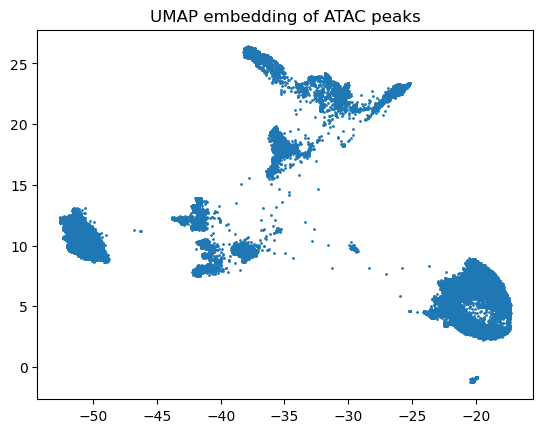

In [7]:
### loop through each matrix and perform UMAP
for txt_fname_inp, txt_fname_out in zip(lst_txt_fname_inp, lst_txt_fname_out):
    
    ### set directory
    txt_fpath_inp = os.path.join(txt_fdiry, txt_fname_inp)
    txt_fpath_out = os.path.join(txt_fdiry, txt_fname_out)
    print(txt_fpath_inp)
    print(txt_fpath_out)
    print()
    
    ### read data
    mat = pd.read_csv(txt_fpath_inp, sep="\t")
    mat = mat.set_index('Region')

    ### random sample
    np.random.seed(123)
    mat = mat.sample(n=50_000)
    
    ### execute
    fit = umap.UMAP(metric='manhattan', n_neighbors=NUM_NEIGHBORS, n_jobs=1, random_state=123)
    mat = mat.to_numpy()
    %time res = fit.fit_transform(mat)

    ### save the results
    dat = pd.DataFrame(res, columns=["UMAP1", "UMAP2"])
    #dat.to_csv(txt_fpath_out, sep="\t", index=False)

    ### show the results
    plt.scatter(res[:,0], res[:,1], s=1)
    plt.title('UMAP embedding of ATAC peaks');
    plt.show()

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.prepare.enh.chipseq_full.fcc.tss.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_70.annotation.prepare.enh.chipseq_full.fcc.tss.tsv



OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 4min 1s, sys: 50.4 s, total: 4min 51s
Wall time: 3min 36s


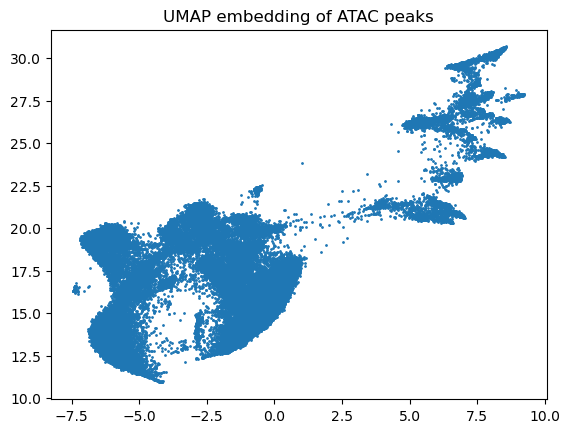

In [11]:
### loop through each matrix and perform UMAP
for txt_fname_inp, txt_fname_out in zip(lst_txt_fname_inp, lst_txt_fname_out):
    
    ### set directory
    txt_fpath_inp = os.path.join(txt_fdiry, txt_fname_inp)
    txt_fpath_out = os.path.join(txt_fdiry, txt_fname_out)
    print(txt_fpath_inp)
    print(txt_fpath_out)
    print()
    
    ### read data
    mat = pd.read_csv(txt_fpath_inp, sep="\t")
    mat = mat.set_index('Region')
    
    ### execute
    fit = umap.UMAP(metric='manhattan', n_neighbors=NUM_NEIGHBORS, n_jobs=1, random_state=123)
    mat = mat.to_numpy()
    %time res = fit.fit_transform(mat)

    ### save the results
    dat = pd.DataFrame(res, columns=["UMAP1", "UMAP2"])
    #dat.to_csv(txt_fpath_out, sep="\t", index=False)

    ### show the results
    plt.scatter(res[:,0], res[:,1], s=1)
    plt.title('UMAP embedding of ATAC peaks');
    plt.show()

In [17]:
mat.shape

(47686, 536)

In [18]:
dat.shape

(47686, 2)

In [19]:
dat

,UMAP1,UMAP2
0,3.158613,15.126688
1,10.906013,16.838097
2,1.488621,18.008656
3,-4.141964,15.558125
4,17.220215,14.306340
...,...,...
47681,1.565820,17.615765
47682,1.902110,18.361055
47683,-4.264168,15.975935
47684,3.217806,15.568717


In [21]:
vec = mat.Index

AttributeError: 'numpy.ndarray' object has no attribute 'Index'

In [24]:
mat = pd.read_csv(txt_fpath_inp, sep="\t")
vec = mat.Region
mat = mat.set_index('Region')

In [25]:
vec

0              chr1:115429-115969
1              chr1:184091-184563
2              chr1:605104-605675
3              chr1:778233-779389
4              chr1:818708-819335
                   ...           
47681    chrX:155745699-155746091
47682    chrX:155767150-155768005
47683    chrX:155880782-155881899
47684    chrX:155997331-155998028
47685    chrX:156000431-156003126
Name: Region, Length: 47686, dtype: object

In [28]:
dat.assign(Region = vec)

,UMAP1,UMAP2,Region
0,3.158613,15.126688,chr1:115429-115969
1,10.906013,16.838097,chr1:184091-184563
2,1.488621,18.008656,chr1:605104-605675
3,-4.141964,15.558125,chr1:778233-779389
4,17.220215,14.306340,chr1:818708-819335
...,...,...,...
47681,1.565820,17.615765,chrX:155745699-155746091
47682,1.902110,18.361055,chrX:155767150-155768005
47683,-4.264168,15.975935,chrX:155880782-155881899
47684,3.217806,15.568717,chrX:155997331-155998028
